In [277]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from textblob import TextBlob
##import re, string, unicodedata
import nltk
##import contractions
##import inflect
 ## from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [278]:
df = pd.read_csv('survey1.csv')

In [279]:
df['Question text'][0]

'Thinking about the contact you have had with L&Q about your complaint, is there anything else we could have done better?'

In [280]:
df.columns

Index(['Question text', 'Date', 'Comment', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [281]:
df=df.drop(['Question text','Unnamed: 3', 'Unnamed: 4'], axis=1)

In [282]:
df.shape

(429, 2)

In [283]:
df['Comment'][2]

"My complaint lasted nearly a year, it is still ongoing. However, they have closed the complaint and would not agree to all the repairs being done. However, the complaints officer has closed the complaint without confirming it with me, which I was quite surprised about and upset about. I feel that the last repair that was to be done by LandQ, was not done to our standard and was not actually done. So but they closed the case to improve case which I am not happy about and overall none of the senior management acknowledged me at all. I copied in senior managers and the Director David Montague. He did not reply once, I was upset about that because we are all customers, which was quite upsetting because generally complaints are resolved very quickly. However, LandQ was very sluggish in this and they lost one of my complaints because apparently it disappeared on their system, which it didn't but it was just made up by one of the staff that it disappeared. I got a complaints number and they 

In [284]:
## To lower case everything
df['Comment_short'] = df['Comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [285]:
df['Comment'][2]

"My complaint lasted nearly a year, it is still ongoing. However, they have closed the complaint and would not agree to all the repairs being done. However, the complaints officer has closed the complaint without confirming it with me, which I was quite surprised about and upset about. I feel that the last repair that was to be done by LandQ, was not done to our standard and was not actually done. So but they closed the case to improve case which I am not happy about and overall none of the senior management acknowledged me at all. I copied in senior managers and the Director David Montague. He did not reply once, I was upset about that because we are all customers, which was quite upsetting because generally complaints are resolved very quickly. However, LandQ was very sluggish in this and they lost one of my complaints because apparently it disappeared on their system, which it didn't but it was just made up by one of the staff that it disappeared. I got a complaints number and they 

In [286]:
## remove punctuation
df['Comment_short'] = df['Comment_short'].str.replace('[^\w\s]','')

In [287]:
df['Comment_short'][2]

'my complaint lasted nearly a year it is still ongoing however they have closed the complaint and would not agree to all the repairs being done however the complaints officer has closed the complaint without confirming it with me which i was quite surprised about and upset about i feel that the last repair that was to be done by landq was not done to our standard and was not actually done so but they closed the case to improve case which i am not happy about and overall none of the senior management acknowledged me at all i copied in senior managers and the director david montague he did not reply once i was upset about that because we are all customers which was quite upsetting because generally complaints are resolved very quickly however landq was very sluggish in this and they lost one of my complaints because apparently it disappeared on their system which it didnt but it was just made up by one of the staff that it disappeared i got a complaints number and they could not find tha

In [288]:
## remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Comment_short'] = df['Comment_short'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Comment_short'][2]

'complaint lasted nearly year still ongoing however closed complaint would agree repairs done however complaints officer closed complaint without confirming quite surprised upset feel last repair done landq done standard actually done closed case improve case happy overall none senior management acknowledged copied senior managers director david montague reply upset customers quite upsetting generally complaints resolved quickly however landq sluggish lost one complaints apparently disappeared system didnt made one staff disappeared got complaints number could find complaint apparently went system received reference number quite confused lying'

In [289]:
most = pd.Series(' '.join(df['Comment_short']).split()).value_counts()[:10]
most

complaint    213
actually     131
im           123
thank        113
know         104
time         104
dont          99
get           99
could         98
going         97
dtype: int64

In [290]:
most = list(most.index)
df['Comment_short'] = df['Comment_short'].apply(lambda x: " ".join(x for x in x.split() if x not in most))
df['Comment_short'].head()

0    absolutely everything would changed everything...
1        tried information problem making decision bye
2    lasted nearly year still ongoing however close...
3    think landq listen tenants properly make sure ...
4    also scheming help people best opportunities p...
Name: Comment_short, dtype: object

In [291]:
df['Comment_short'][2]

'lasted nearly year still ongoing however closed would agree repairs done however complaints officer closed without confirming quite surprised upset feel last repair done landq done standard done closed case improve case happy overall none senior management acknowledged copied senior managers director david montague reply upset customers quite upsetting generally complaints resolved quickly however landq sluggish lost one complaints apparently disappeared system didnt made one staff disappeared got complaints number find apparently went system received reference number quite confused lying'

In [292]:
most2 = pd.Series(' '.join(df['Comment_short']).split()).value_counts()[:10]
most2

think     96
ive       95
people    93
done      87
back      79
still     78
need      78
got       76
would     75
one       75
dtype: int64

In [293]:
from textblob import TextBlob

In [294]:
TextBlob(df['Comment_short'][2]).words

WordList(['lasted', 'nearly', 'year', 'still', 'ongoing', 'however', 'closed', 'would', 'agree', 'repairs', 'done', 'however', 'complaints', 'officer', 'closed', 'without', 'confirming', 'quite', 'surprised', 'upset', 'feel', 'last', 'repair', 'done', 'landq', 'done', 'standard', 'done', 'closed', 'case', 'improve', 'case', 'happy', 'overall', 'none', 'senior', 'management', 'acknowledged', 'copied', 'senior', 'managers', 'director', 'david', 'montague', 'reply', 'upset', 'customers', 'quite', 'upsetting', 'generally', 'complaints', 'resolved', 'quickly', 'however', 'landq', 'sluggish', 'lost', 'one', 'complaints', 'apparently', 'disappeared', 'system', 'didnt', 'made', 'one', 'staff', 'disappeared', 'got', 'complaints', 'number', 'find', 'apparently', 'went', 'system', 'received', 'reference', 'number', 'quite', 'confused', 'lying'])

In [295]:
#from nltk.stem import PorterStemmer
#st = PorterStemmer()
#df['Comment_short'] = df['Comment_short'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [296]:
df['Comment_short'][2]

'lasted nearly year still ongoing however closed would agree repairs done however complaints officer closed without confirming quite surprised upset feel last repair done landq done standard done closed case improve case happy overall none senior management acknowledged copied senior managers director david montague reply upset customers quite upsetting generally complaints resolved quickly however landq sluggish lost one complaints apparently disappeared system didnt made one staff disappeared got complaints number find apparently went system received reference number quite confused lying'

In [297]:
#make wordcoud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

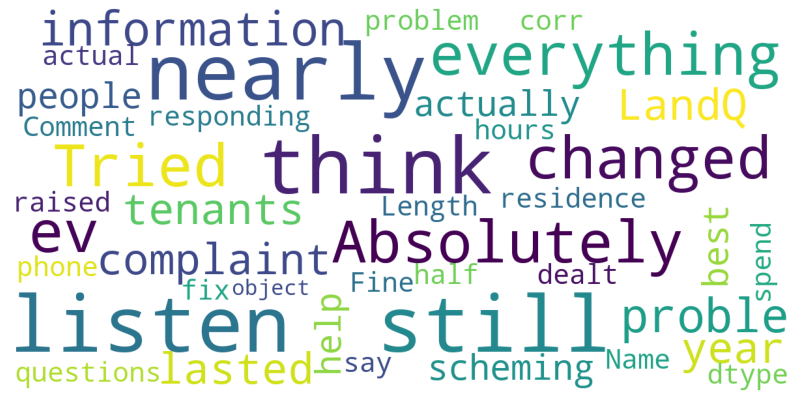

In [298]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['Comment'])

In [299]:
from textblob import TextBlob
statement = "poor choice" #testing
sentiment1 = TextBlob(statement).sentiment

In [300]:
sentiment1

Sentiment(polarity=-0.4, subjectivity=0.6)

In [301]:
statement = "excellent goal" 
sentiment2 = TextBlob(statement).sentiment
sentiment2

Sentiment(polarity=1.0, subjectivity=1.0)

In [302]:
def senti(x):
    return TextBlob(x).sentiment

In [303]:
df['senti_score'] = df['Comment_short'].apply(senti)


In [304]:
df.senti_score.head()

0                                   (0.2, 0.9)
1                                   (0.0, 0.0)
2    (0.05595238095238097, 0.3619047619047619)
3    (0.23928571428571427, 0.4984126984126985)
4                                  (0.6, 0.25)
Name: senti_score, dtype: object

In [305]:
df.shape

(429, 4)

In [306]:
df

,Date,Comment,Comment_short,senti_score
0,01/01/2020 10:02,"Absolutely everything, I would have changed ev...",absolutely everything would changed everything...,"(0.2, 0.9)"
1,01/01/2020 10:02,Tried to get more information about the proble...,tried information problem making decision bye,"(0.0, 0.0)"
2,01/01/2020 10:04,"My complaint lasted nearly a year, it is still...",lasted nearly year still ongoing however close...,"(0.05595238095238097, 0.3619047619047619)"
3,02/01/2020 10:02,I think LandQ should listen to their tenants p...,think landq listen tenants properly make sure ...,"(0.23928571428571427, 0.4984126984126985)"
4,03/01/2020 10:03,I also scheming to help people that have best ...,also scheming help people best opportunities p...,"(0.6, 0.25)"
...,...,...,...,...
424,27/11/2020 10:03,I actually responding to questions raised corr...,responding questions raised correctly giving r...,"(0.01938775510204082, 0.4051020408163265)"
425,27/11/2020 10:03,Fine how it could be dealt with it is if I can...,fine dealt line home would processed would goo...,"(0.3066666666666667, 0.35333333333333333)"
426,27/11/2020 10:04,"To fix the actual problem, we're still nearly ...",fix actual problem still nearly 3 weeks hot wa...,"(0.05959595959595961, 0.5241414141414142)"
427,28/11/2020 10:03,I say I think you do not listen to residence I...,say think listen residence think addressed use...,"(-0.27499999999999997, 0.425)"


In [307]:
df = df.round(3)
df

,Date,Comment,Comment_short,senti_score
0,01/01/2020 10:02,"Absolutely everything, I would have changed ev...",absolutely everything would changed everything...,"(0.2, 0.9)"
1,01/01/2020 10:02,Tried to get more information about the proble...,tried information problem making decision bye,"(0.0, 0.0)"
2,01/01/2020 10:04,"My complaint lasted nearly a year, it is still...",lasted nearly year still ongoing however close...,"(0.05595238095238097, 0.3619047619047619)"
3,02/01/2020 10:02,I think LandQ should listen to their tenants p...,think landq listen tenants properly make sure ...,"(0.23928571428571427, 0.4984126984126985)"
4,03/01/2020 10:03,I also scheming to help people that have best ...,also scheming help people best opportunities p...,"(0.6, 0.25)"
...,...,...,...,...
424,27/11/2020 10:03,I actually responding to questions raised corr...,responding questions raised correctly giving r...,"(0.01938775510204082, 0.4051020408163265)"
425,27/11/2020 10:03,Fine how it could be dealt with it is if I can...,fine dealt line home would processed would goo...,"(0.3066666666666667, 0.35333333333333333)"
426,27/11/2020 10:04,"To fix the actual problem, we're still nearly ...",fix actual problem still nearly 3 weeks hot wa...,"(0.05959595959595961, 0.5241414141414142)"
427,28/11/2020 10:03,I say I think you do not listen to residence I...,say think listen residence think addressed use...,"(-0.27499999999999997, 0.425)"


In [308]:
df['senti_score'][0][0]
df['Polarity'] = df['senti_score'].apply(lambda x: x[0])
df['Subjectivity'] = df['senti_score'].apply(lambda x: x[1])

In [309]:
df

,Date,Comment,Comment_short,senti_score,Polarity,Subjectivity
0,01/01/2020 10:02,"Absolutely everything, I would have changed ev...",absolutely everything would changed everything...,"(0.2, 0.9)",0.200000,0.900000
1,01/01/2020 10:02,Tried to get more information about the proble...,tried information problem making decision bye,"(0.0, 0.0)",0.000000,0.000000
2,01/01/2020 10:04,"My complaint lasted nearly a year, it is still...",lasted nearly year still ongoing however close...,"(0.05595238095238097, 0.3619047619047619)",0.055952,0.361905
3,02/01/2020 10:02,I think LandQ should listen to their tenants p...,think landq listen tenants properly make sure ...,"(0.23928571428571427, 0.4984126984126985)",0.239286,0.498413
4,03/01/2020 10:03,I also scheming to help people that have best ...,also scheming help people best opportunities p...,"(0.6, 0.25)",0.600000,0.250000
...,...,...,...,...,...,...
424,27/11/2020 10:03,I actually responding to questions raised corr...,responding questions raised correctly giving r...,"(0.01938775510204082, 0.4051020408163265)",0.019388,0.405102
425,27/11/2020 10:03,Fine how it could be dealt with it is if I can...,fine dealt line home would processed would goo...,"(0.3066666666666667, 0.35333333333333333)",0.306667,0.353333
426,27/11/2020 10:04,"To fix the actual problem, we're still nearly ...",fix actual problem still nearly 3 weeks hot wa...,"(0.05959595959595961, 0.5241414141414142)",0.059596,0.524141
427,28/11/2020 10:03,I say I think you do not listen to residence I...,say think listen residence think addressed use...,"(-0.27499999999999997, 0.425)",-0.275000,0.425000


In [310]:
df.describe()

,Polarity,Subjectivity
count,429.000000,429.000000
mean,0.070625,0.379614
std,0.254151,0.278515
min,-1.000000,0.000000
25%,0.000000,0.100000
50%,0.006250,0.405429
75%,0.200000,0.571429
max,0.800000,1.000000


In [311]:
df.nlargest(5,['Polarity'])

,Date,Comment,Comment_short,senti_score,Polarity,Subjectivity
257,05/08/2020 10:03,"Yeah, I'm very happy that everything is resolv...",yeah happy everything resolved took quite took...,"(0.8, 1.0)",0.80,1.00
262,06/08/2020 10:03,Hi I am still waiting for a person to give me ...,hi still waiting person give call dealing alre...,"(0.8, 0.75)",0.80,0.75
258,05/08/2020 10:03,Well it would have been helpful if my complain...,well would helpful resolved successfully hasnt...,"(0.75, 0.95)",0.75,0.95
12,08/01/2020 10:02,I'm actually still waiting for my complaint to...,still waiting knowledge sums somebody contact ...,"(0.7, 0.6000000000000001)",0.70,0.60
75,12/02/2020 10:03,It would be good if you could get the cladding...,would good cladding tested building,"(0.7, 0.6000000000000001)",0.70,0.60


In [312]:
df['Comment'][257]

"Yeah, I'm very happy that everything is resolved, it took quite a while, it took about a year but in the end, thank you More Than."

In [313]:
df.nsmallest(10,['Polarity'])

,Date,Comment,Comment_short,senti_score,Polarity,Subjectivity
41,28/01/2020 10:03,Yeah you could of actually listened and resolv...,yeah listened resolved issue instead waiting 4...,"(-1.0, 1.0)",-1.000000,1.000000
326,01/10/2020 10:03,Not twisting the figures so that my stage 3 co...,twisting figures stage 3 stays stage 1 ie comp...,"(-0.8, 0.8)",-0.800000,0.800000
332,02/10/2020 10:03,My complaint could have been reviewed and deal...,reviewed dealt rather ignored dealt ive waited...,"(-0.8, 1.0)",-0.800000,1.000000
47,29/01/2020 10:03,Could have got bad (?).,got bad,"(-0.6999999999999998, 0.6666666666666666)",-0.700000,0.666667
253,01/08/2020 10:04,Very bad everything was very very bad thank yo...,bad everything bad bye,"(-0.6999999999999998, 0.6666666666666666)",-0.700000,0.666667
65,07/02/2020 10:03,Well I think you could of understood the stres...,well think understood stress cold poorly feel ...,"(-0.6666666666666666, 0.8666666666666667)",-0.666667,0.866667
214,02/07/2020 10:04,Bloody useless.,bloody useless,"(-0.65, 0.55)",-0.650000,0.550000
422,27/11/2020 10:02,I haven't got hours to explain all the crap I ...,havent got hours explain crap queue suggest so...,"(-0.5458333333333334, 0.6708333333333334)",-0.545833,0.670833
62,05/02/2020 10:03,It would help if they could send someone who c...,would help send someone sort problems weve spe...,"(-0.5333333333333333, 0.7000000000000001)",-0.533333,0.700000
293,03/09/2020 10:03,I actually haven't got anyone to speak to me a...,havent got anyone speak ive complained 2 times...,"(-0.525, 0.475)",-0.525000,0.475000


In [314]:
df['Comment'][326]
df['Comment'][422]

"I haven't got hours to explain all the crap I have been through with in a queue so I suggest that someone called me to fifteen months after buying this fact from you I'm still living in hell it and I have asked meantime someone senior to call me and no one ever done with you guys should hang their heads in shame I've worked hard all my life I paid a lot of money for this that and you don't even care"

In [ ]:

# did it change over time?
# the volume of the survey per month?